In [18]:
# read this dictionary and print the structure of this dictionary
path = '/Users/leo/Desktop/DeepPostures_MAE/MoCA/subject_level_performance/CNNBiLSTMModel/hipset_1.0_blr_0.001_bs_512_input_size_[3, 4200]_subject_performance.pkl'
import pickle
with open(path, 'rb') as f:
    data = pickle.load(f)

data['train']

{'i0002A': {'bal_acc': 92.74740517139435, 'f1': 94.1965401172638},
 'i0003A': {'bal_acc': 93.53022575378418, 'f1': 95.28899192810059},
 'i0005A': {'bal_acc': 89.28866982460022, 'f1': 89.62870836257935},
 'i0011A': {'bal_acc': 91.0578727722168, 'f1': 92.70988702774048},
 'i0016A': {'bal_acc': 94.60636377334595, 'f1': 94.35254335403442},
 'i0016B': {'bal_acc': 96.06621265411377, 'f1': 96.12199068069458},
 'i0017A': {'bal_acc': 87.26752400398254, 'f1': 92.4297571182251},
 'i0024A': {'bal_acc': 95.29561400413513, 'f1': 96.45819664001465},
 'i0025B': {'bal_acc': 93.99827718734741, 'f1': 95.53937911987305},
 'i0032A': {'bal_acc': 91.6603535413742, 'f1': 93.90319585800171},
 'i0032B': {'bal_acc': 96.04389369487762, 'f1': 96.71963453292847},
 'i0034A': {'bal_acc': 89.42307829856873, 'f1': 97.51308560371399},
 'i0036A': {'bal_acc': 92.8644061088562, 'f1': 92.86280870437622},
 'i0037A': {'bal_acc': 52.39691734313965, 'f1': 49.08006489276886},
 'i0045A': {'bal_acc': 95.7740306854248, 'f1': 96.583

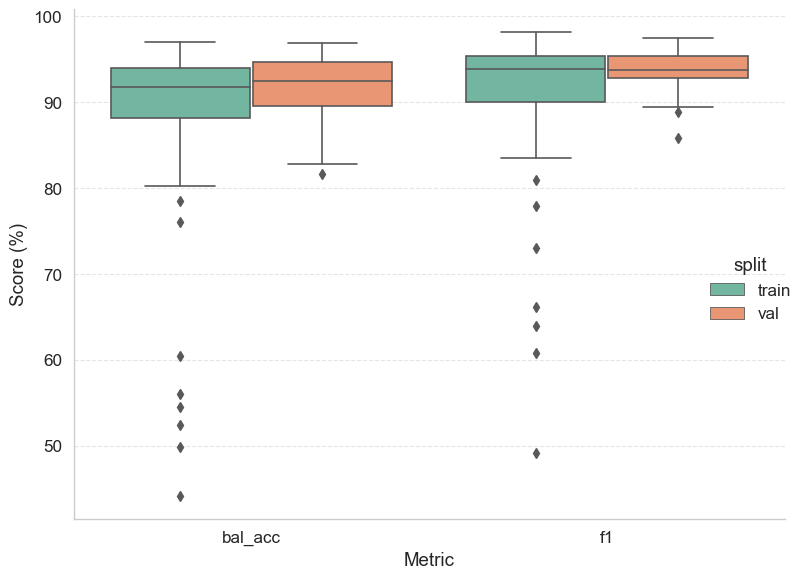

In [19]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
path = '/Users/leo/Desktop/DeepPostures_MAE/MoCA/subject_level_performance/CNNBiLSTMModel/hipset_1.0_blr_0.001_bs_512_input_size_[3, 4200]_subject_performance.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)

# Flatten dictionary into DataFrame with metric and split info
def collect_metric_data(split_name, subject_dict):
    df = pd.DataFrame.from_dict(subject_dict, orient='index')
    df['subject_id'] = df.index
    df['split'] = split_name
    return df

dfs = []
for split_name in ['train', 'val', 'test']:
    if split_name in data:
        dfs.append(collect_metric_data(split_name, data[split_name]))

# Combine all splits
all_df = pd.concat(dfs, ignore_index=True)

# Reshape into long format for seaborn
melted = all_df.melt(id_vars=['subject_id', 'split'], 
                     value_vars=['bal_acc', 'f1'],
                     var_name='Metric', 
                     value_name='Score')

# Plot
sns.set(style='whitegrid', context='paper', font_scale=1.4)

g = sns.catplot(
    data=melted, kind='box',
    x='Metric', y='Score', hue='split',
    palette='Set2', height=6, aspect=1.2
)

g.set_axis_labels("Metric", "Score (%)")
g.set_titles("Per-Metric Distribution Across Splits")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("subject_metric_boxplot_by_split.png", dpi=300, bbox_inches='tight')
plt.show()


In [20]:
#I want only split is train
train_df = all_df[all_df['split'] == 'train']
print(train_df['bal_acc'].mean())
print(train_df['f1'].mean())

88.1422386125282
91.00619653860728


In [21]:
# sort all_df with bal_acc where low at the top

sorted_df = all_df.sort_values(by='bal_acc', ascending=True)
sorted_df.head(20)

,bal_acc,f1,subject_id,split
32,44.174027,72.952449,i0121A,train
52,49.787126,66.107023,i0206A,train
13,52.396917,49.080065,i0037A,train
29,54.470421,60.792279,i0113A,train
51,55.982056,63.965034,i0202A,train
57,60.416901,83.532566,i0226A,train
25,76.083106,93.385279,i0093A,train
76,78.506464,77.852154,i0352A,train
55,80.183768,86.615437,i0216A_1,train
38,81.213635,84.594560,i0142A_1,train


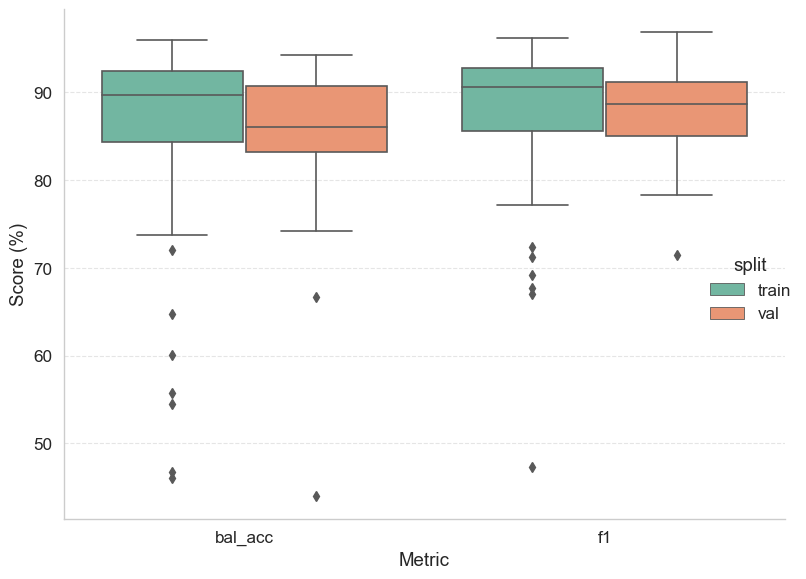

,bal_acc,f1,subject_id,split
94,44.047620,78.339571,i0195A,val
13,46.053337,47.336286,i0037A,train
32,46.747562,67.073035,i0121A,train
52,54.506545,69.157577,i0206A,train
51,55.792096,67.720318,i0202A,train
29,60.031784,71.252322,i0113A,train
57,64.770538,82.579541,i0226A,train
90,66.707572,71.437353,i0118A_1,val
55,71.994385,80.213898,i0216A_1,train
23,73.777485,82.980925,i0083A,train


In [22]:
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load data
path = '/Users/leo/Desktop/DeepPostures_MAE/MoCA/subject_level_performance/CNNBiLSTMModel/wristset_1.0_blr_0.001_bs_512_input_size_[3, 4200]_subject_performance.pkl'
with open(path, 'rb') as f:
    data = pickle.load(f)

# Flatten dictionary into DataFrame with metric and split info
def collect_metric_data(split_name, subject_dict):
    df = pd.DataFrame.from_dict(subject_dict, orient='index')
    df['subject_id'] = df.index
    df['split'] = split_name
    return df

dfs = []
for split_name in ['train', 'val', 'test']:
    if split_name in data:
        dfs.append(collect_metric_data(split_name, data[split_name]))

# Combine all splits
all_df = pd.concat(dfs, ignore_index=True)

# Reshape into long format for seaborn
melted = all_df.melt(id_vars=['subject_id', 'split'], 
                     value_vars=['bal_acc', 'f1'],
                     var_name='Metric', 
                     value_name='Score')

# Plot
sns.set(style='whitegrid', context='paper', font_scale=1.4)

g = sns.catplot(
    data=melted, kind='box',
    x='Metric', y='Score', hue='split',
    palette='Set2', height=6, aspect=1.2
)

g.set_axis_labels("Metric", "Score (%)")
g.set_titles("Per-Metric Distribution Across Splits")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("subject_metric_boxplot_by_split.png", dpi=300, bbox_inches='tight')
plt.show()

# sort all_df with bal_acc where low at the top

sorted_df = all_df.sort_values(by='bal_acc', ascending=True)
sorted_df.head(20)


In [23]:
#I want only split is train
train_df = all_df[all_df['split'] == 'train']
print(train_df['bal_acc'].mean())
print(train_df['f1'].mean())

86.1163072012089
88.19667527705063
